In [24]:
# Data - Generate using Numpy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
mean_01= np.array([1,0.5])
cov_01= np.array([[1,0.1],[0.1,1.2]])

mean_02= np.array([4,5])
cov_02= np.array([[1.2,0.1],[0.1,1.3]])

dist_01= np.random.multivariate_normal(mean_01,cov_01,500)
dist_02= np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)

(500, 2)


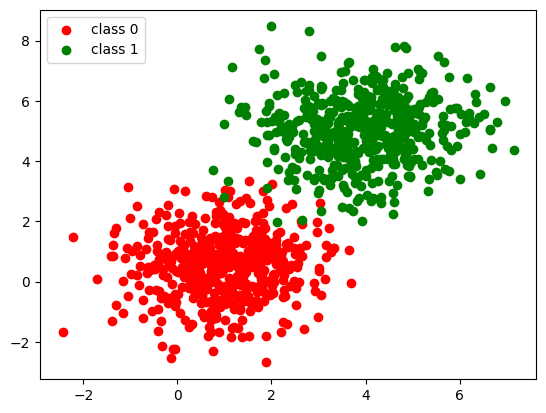

In [18]:
plt.scatter(dist_01[:,0],dist_01[:,1],color='red',label="class 0")
plt.scatter(dist_02[:,0],dist_02[:,1],color='green',label="class 1")
plt.legend()
plt.show()

In [19]:
data=np.zeros((1000,3))

In [21]:
data[:500,:2]=dist_01
data[500:,:2]=dist_02

data[500:,-1]=1

In [26]:
pd.DataFrame(data)

,0,1,2
0,0.258877,0.009486,0.0
1,-0.219252,0.137047,0.0
2,1.662091,1.715782,0.0
3,1.312288,-0.462511,0.0
4,2.044037,-0.021197,0.0
...,...,...,...
995,4.775651,5.215240,1.0
996,3.791698,4.318744,1.0
997,5.907968,5.751196,1.0
998,4.814634,4.964076,1.0


In [31]:
np.random.shuffle(data)

In [33]:
pd.DataFrame(data)

,0,1,2
0,3.563498,3.778423,1.0
1,4.277583,5.206425,1.0
2,4.139782,4.683716,1.0
3,3.100606,4.846435,1.0
4,-0.460844,2.062482,0.0
...,...,...,...
995,1.830907,1.136742,0.0
996,0.362376,1.193502,0.0
997,3.651992,2.453353,1.0
998,2.842136,4.378644,1.0


In [38]:
# divide the data into train and test part
split= int(0.8*data.shape[0])
x_train= data[:split,:-1]
x_test= data[split:,:-1]

y_train= data[:split,-1]
y_test= data[split:,-1]

In [39]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(800, 2) (200, 2) (800,) (200,)


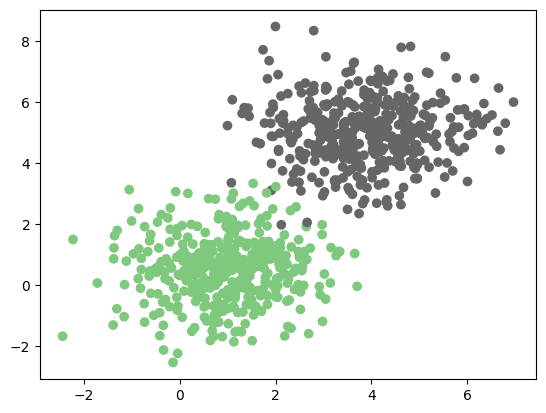

In [46]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.Accent)
plt.show()

In [60]:
# Data Nomilisation

x_mean= x_train.mean(axis=0)
x_std= x_train.std(axis=0)

# Apply the transformation
x_train= (x_train-x_mean)/x_std

# apply the transformation test data
x_test= (x_test-x_mean)/x_std

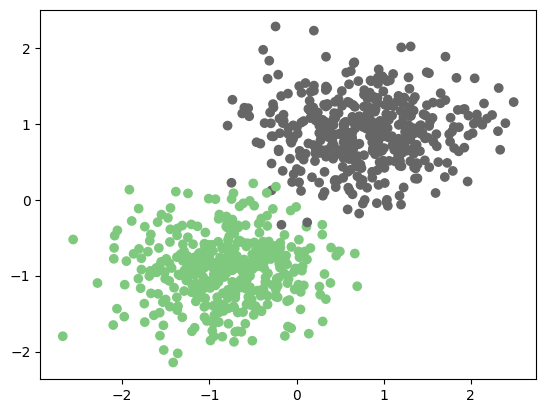

In [62]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.Accent)
plt.show()

 ### Logestic Regression Implementation

In [113]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def hypothesis(x,theta):
    """
    x- entire array(m,n+1)
    theta- np.array(n+1,1)
    x*theta- (m,1)
    """
    return sigmoid(np.dot(x,theta))

def error(x, y, theta):
    """
    params:
    x- (m,n+1)
    y- (m,1)
    theta- (n+1,1)
    return:
        scale_vlaue= loss
    """
    hi= hypothesis(x,theta)
    e= -1*np.mean((y*np.log2(hi)+ ((1-y)*np.log2(1-hi))))
    
    return e/x.shape[0]

In [112]:
def gradient(x,y, theta):
    """
    params:
    x- (m,n+1)
    y- (m,1)
    theta- (n+1,1)
    
    return:
        gradient_vector- (n+1,1)
    """
    hi= hypothesis(x,theta)
    grad= -np.dot(x.T,(y-hi))
    m= x.shape[0]
    return grad/m

def gradient_descent(x,y,lr=0.1,max_itr=500):
    n= x.shape[1]
    theta= np.zeros((n,1))
    
    error_list= []
    
    for i in range(max_itr):
        err= error(x,y,theta)
        error_list.append(err)
        
        grad= gradient(x,y,theta)
        
        #update
        theta= theta - lr*grad
        
    return (theta,error_list)

In [120]:
ones= np.ones((x_train.shape[0],1))
x_new_train=np.hstack((ones,x_train))
print(x_new_train.shape)
print(x_new_train)
y_train= y_train.reshape((-1,1))
print(y_train.shape)

(800, 3)
[[ 1.          0.6216314   0.39464096]
 [ 1.          1.01466789  0.96863614]
 [ 1.          0.9388217   0.75852967]
 ...
 [ 1.          0.99781441  0.87053562]
 [ 1.         -0.79294709 -0.62241975]
 [ 1.         -0.57101422 -0.94234941]]
(800, 1)


In [130]:
import time
st_time=time.time()
theta,error_list= gradient_descent(x_new_train,y_train)
end_time=time.time()
print(end_time-st_time)

0.05659890174865723


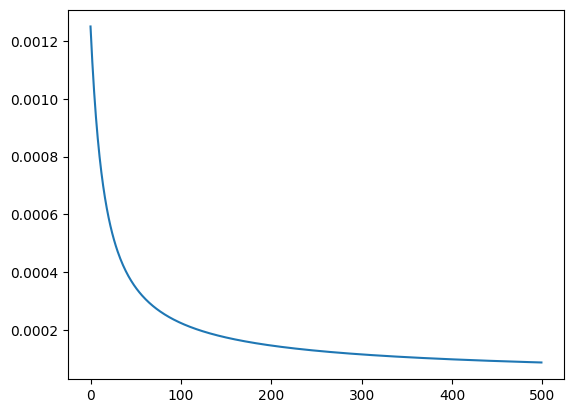

In [131]:
plt.plot(error_list)
plt.show()

In [133]:
theta


array([[0.09460981],
       [2.11860215],
       [2.9747554 ]])

### Visualise Decision Surface

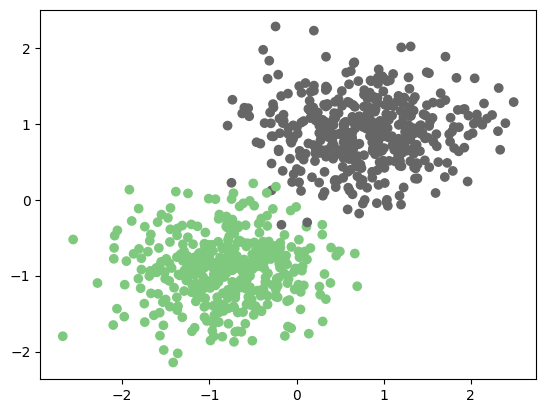

In [136]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train.reshape((-1,)),cmap=plt.cm.Accent)
 
plt.show()

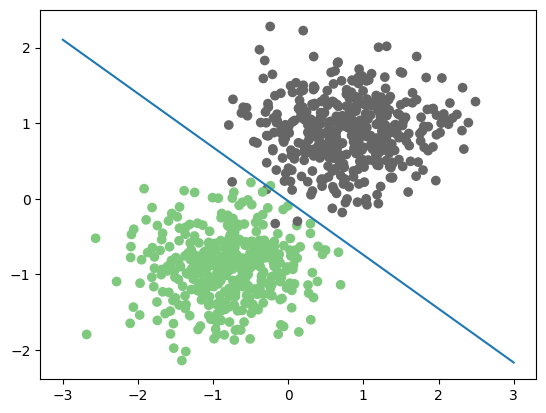

In [138]:
x1= np.arange(-3,4)

x2= -(theta[0]+theta[1]*x1)/theta[2]

plt.scatter(x_train[:,0],x_train[:,1],c=y_train.reshape((-1,)),cmap=plt.cm.Accent)
plt.plot(x1,x2)
plt.show()

### Prediction & Accuracy

In [141]:
ones= np.ones((x_test.shape[0],1))
x_new_test=np.hstack((ones,x_test))
print(x_new_test.shape)
print(x_new_test[:3,:])

(200, 3)
[[ 1.          0.75494707 -2.29244058]
 [ 1.          3.16924385  0.82300822]
 [ 1.          5.14076984  5.79364644]]


In [214]:
def predict(x,theta):
    h= hypothesis(x,theta)
    output= np.zeros(h.shape)
    
    output[h>=0.5]=1
#     print(h[:5,:])
    output=output.astype('int')
    return output


In [215]:
xtrain_pred=predict(x_new_train,theta)
xtest_pred=predict(x_new_test,theta)
# print(xtrain_pred[:5,:])
# print(xtest_pred[:5,:])
print(xtest_pred.shape)

(200, 1)


In [216]:
y_test=y_test.reshape((-1,1))
# y_test
# y_train

In [217]:
def accuracy(actual,pred):
    actual= actual.astype('int')
#     actual=actual.reshape((-1,1))
    print(actual.shape)
    acc=np.sum(actual==pred)/actual.shape[0]
    return acc*100


In [219]:
train_acc= accuracy(y_train,xtrain_pred)
test_acc= accuracy(y_test,xtest_pred)
print(train_acc,test_acc)

(800, 1)
(200, 1)
99.375 56.00000000000001


In [192]:
np.sum(y_test==xtest_pred)/y_test.shape[0]

96.64